In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [10]:
filename ='cc_cross_section_no_corr.txt'
df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
df.style.hide(axis="index")
geo_filename = "result_geo_corr_factor.txt"
df_geo = pd.read_csv(geo_filename,sep="\t",names=["datatype","targettype","RunID","energy","geo_corr"])
df_geo.style.hide(axis="index")
result_geo = pd.merge(df, df_geo,how="inner",on=["RunID","datatype","targettype","energy"])
iso_filename = "final_iso_corr_cac_combined.txt"
df_iso = pd.read_csv(iso_filename,sep="\t",names=["datatype","targettype","RunID","energy","iso_corr"])
df_iso.style.hide(axis="index")
result = pd.merge(result_geo,df_iso,how="inner",on=["RunID","datatype","targettype","energy"])
result

,datatype,targettype,RunID,energy,incoming ions,survived_ions,d_survived,geo_corr,iso_corr
0,exp,c_1086,0181_0001,400,607009,552111,0.090440,1.00227,0.007789
1,exp,c_1086,0101_0001,550,451164,410044,0.091142,1.00161,0.009573
2,exp,c_1086,0127_0001,650,500728,454778,0.091766,1.00079,0.009207
3,exp,c_1086,0168_0001,800,345700,313966,0.091796,1.00048,0.006674
4,exp,c_2198,0183_0001,400,656259,553053,0.157264,1.00442,0.012336
5,exp,c_2198,0103_0001,550,436487,367603,0.157815,1.00209,0.016251
6,exp,c_2198,0130_0001,650,530898,445651,0.160571,1.00093,0.015251
7,exp,c_2198,0170_0001,800,479742,402409,0.161197,1.00099,0.012775
8,exp,c_54,0179_0001,400,569925,537743,0.056467,1.00159,0.005632
9,exp,c_54,0099_0001,550,476356,449093,0.057232,1.00119,0.006372


In [3]:
new_density = 1.851
T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
factor_2198 = (1./T_2198)*(pow(10,27))
factor_1086 = (1./T_1086)*(pow(10,27))
factor_54 = (1./T_54)*(pow(10,27))

In [23]:
cc_2198_val = []
cc_1086_val = []
cc_54_val = []
cc_geo_corr_2198_val = []
cc_geo_corr_1086_val = []
cc_geo_corr_54_val = []
tot_cs_2198_val = []
tot_cs_1086_val = []
tot_cs_54_val = []
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    dz_2198 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
    d_geo_2198 = float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_iso_2198 = (1-float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))
    
    dz_1086 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_1086") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
    d_geo_1086 = float(result_geo.loc[(result_geo["targettype"] == "c_1086") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_iso_1086 = (1-float(result.loc[(result["targettype"] == "c_1086") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))
    
    dz_54 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_54") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
    d_geo_54 = float(result_geo.loc[(result_geo["targettype"] == "c_54") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_iso_54 = (1-float(result.loc[(result["targettype"] == "c_54") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))

    cc_2198 = factor_2198*(-math.log(dz_2198))
    cc_geo_corr_2198 = factor_2198*(-math.log(dz_2198)-math.log(d_geo_2198))
    tot_cs_2198 = factor_2198*(-math.log(dz_2198)-math.log(d_geo_2198)-math.log(d_iso_2198))
    cc_2198_val.append(cc_2198)
    cc_geo_corr_2198_val.append(cc_geo_corr_2198)
    tot_cs_2198_val.append(tot_cs_2198)
    

    cc_54 = factor_54*(-math.log(dz_54))
    cc_geo_corr_54 = factor_54*(-math.log(dz_54)-math.log(d_geo_54))
    tot_cs_54 = factor_54*(-math.log(dz_54)-math.log(d_geo_54)-math.log(d_iso_54))
    cc_54_val.append(cc_54)
    cc_geo_corr_54_val.append(cc_geo_corr_54)
    tot_cs_54_val.append(tot_cs_54)

    cc_1086 = factor_1086*(-math.log(dz_1086))
    cc_geo_corr_1086 = factor_1086*(-math.log(dz_1086)-math.log(d_geo_1086))
    tot_cs_1086 = factor_1086*(-math.log(dz_1086)-math.log(d_geo_1086)-math.log(d_iso_1086))
    cc_1086_val.append(cc_1086)
    cc_geo_corr_1086_val.append(cc_geo_corr_1086)
    tot_cs_1086_val.append(tot_cs_1086)
    #print(cc)
    #print(cc_geo_corr)
    
print(tot_cs_2198_val)
print(tot_cs_1086_val)
print(tot_cs_54_val)




[771.0416411585492, 804.4381867733368, 817.9852985832764, 812.863257681513]
[780.2399145634017, 810.9833935636138, 815.7045352202055, 801.4581340324162]
[790.500509421452, 826.1771017534236, 817.106653077422, 808.913986381144]


/tmp/ipykernel_17354/3306095923.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_17354/3306095923.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_geo_2198 = float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
/tmp/ipykernel_17354/3306095923.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the futu

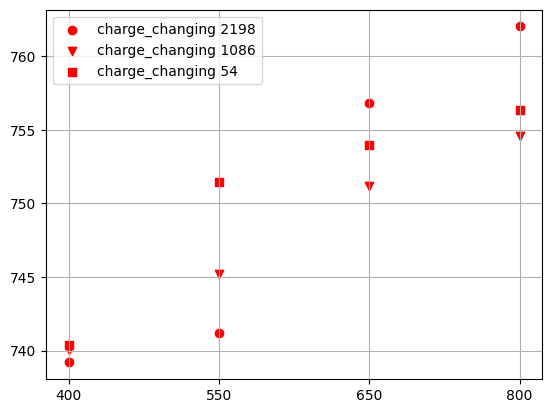

In [30]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_2198_val,label="charge_changing 2198",color='red',marker="o")
ax.scatter(energy_vals,cc_1086_val,label="charge_changing 1086",color ='red',marker="v")
ax.scatter(energy_vals,cc_54_val,label="charge_changing 54",color='red',marker="s")
ax.legend()
ax.grid()

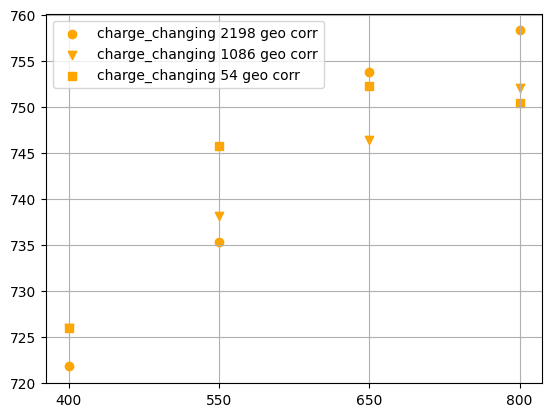

In [29]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_geo_corr_2198_val,label="charge_changing 2198 geo corr",color='orange',marker="o")
ax.scatter(energy_vals,cc_geo_corr_1086_val,label="charge_changing 1086 geo corr",color ='orange',marker="v")
ax.scatter(energy_vals,cc_geo_corr_54_val,label="charge_changing 54 geo corr",color='orange',marker="s")
ax.legend()
ax.grid()

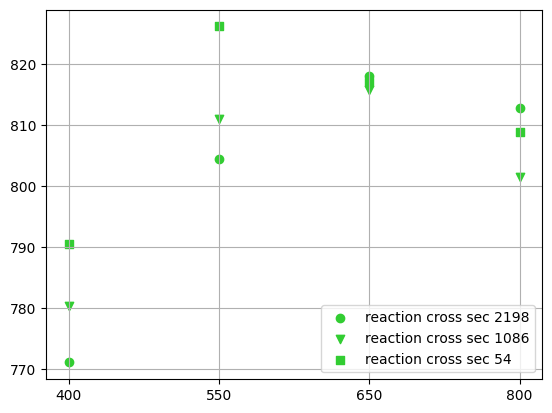

In [28]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,tot_cs_2198_val,label="reaction cross sec 2198",color='limegreen',marker="o")
ax.scatter(energy_vals,tot_cs_1086_val,label="reaction cross sec 1086",color ='limegreen',marker="v")
ax.scatter(energy_vals,tot_cs_54_val,label="reaction cross sec 54",color='limegreen',marker="s")
ax.legend()
ax.grid()

In [5]:
df = pd.DataFrame({"x":[1,2,3], "y":[6,4,3], "z":["testing","pretty","tables"], "f":[0.023432, 0.234321,0.5555]})

df

,x,y,z,f
0,1,6,testing,0.023432
1,2,4,pretty,0.234321
2,3,3,tables,0.555500
